In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Expoloration des données pour en extraire des informations utiles pour l’analyse

Importation des données

In [2]:
salesData = pd.read_csv('sales.csv')
productsData = pd.read_csv('products.csv')
paymentsData = pd.read_csv('payments.csv')

Analyse de salesData

In [3]:
salesData.head()

,order_id,order_item_id,tran_dt,customer_id,dollars,qty,product_id,payment_type_id
0,1,1,2020-01-01,572,550,1,20,2
1,2,2,2020-01-01,532,630,3,11,2
2,3,3,2020-01-01,608,450,2,18,4
3,4,4,2020-01-01,424,110,2,10,2
4,5,5,2020-01-01,584,250,1,8,4


In [4]:
salesData.shape

(10000, 8)

In [5]:
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   order_id         10000 non-null  int64 
 1   order_item_id    10000 non-null  int64 
 2   tran_dt          10000 non-null  object
 3   customer_id      10000 non-null  int64 
 4   dollars          10000 non-null  int64 
 5   qty              10000 non-null  int64 
 6   product_id       10000 non-null  int64 
 7   payment_type_id  10000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 625.1+ KB


Nous pouvons donc dire:
- salesData comporte 8 collonnes et 10000 lignes;
- Il n'y a pas de valeur manquante dans salesData;
- Il y a 7 colonnes qui sont de type 'int64' (entier) et une colonne de type 'object' (objet).

In [6]:
salesData.columns

Index(['order_id', 'order_item_id', 'tran_dt', 'customer_id', 'dollars', 'qty',
       'product_id', 'payment_type_id'],
      dtype='object')

In [7]:
salesData['tran_dt'].value_counts()

2020-01-29    46
2020-08-24    44
2020-01-14    43
2020-09-12    43
2020-01-09    42
              ..
2020-08-04    20
2020-02-26    20
2020-09-14    20
2020-03-04    19
2020-04-24    17
Name: tran_dt, Length: 336, dtype: int64

In [8]:
salesData['tran_dt'].value_counts(ascending=True)

2020-04-24    17
2020-03-04    19
2020-02-26    20
2020-09-14    20
2020-08-04    20
              ..
2020-01-09    42
2020-01-14    43
2020-09-12    43
2020-08-24    44
2020-01-29    46
Name: tran_dt, Length: 336, dtype: int64

In [9]:
salesData.describe(include='O')

,tran_dt
count,10000
unique,336
top,2020-01-29
freq,46


Cette analyse montre qu'il y a plusieurs ventes chaque jour. Le jour où il y a plus de vente cest le 29 Janvier 2020 (2020-01-29). 
Length: 336 signifie qu'il y a 336 dates différentes.

In [10]:
salesData['customer_id'].value_counts(ascending=True)

643     3
304     3
606     3
100     3
656     3
       ..
640    23
347    23
235    23
955    24
877    24
Name: customer_id, Length: 1000, dtype: int64

Cette analyse montre que plusieurs clients ont acheté plusieurs fois sur le site de vente.
Par exemple le client dont l'identifiant est 643 a acheté 3 fois; celui dont l'identifiant est 955 a acheté 24 fois.

In [11]:
salesData.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [12]:
salesData.duplicated().sum()

0

Nous constatons qu'il n'y a pas de doublons dans salesData c'est-à-dire qu'il n'y a pas de lignes dupliquées. 

In [13]:
salesData.describe()

,order_id,order_item_id,customer_id,dollars,qty,product_id,payment_type_id
count,10000.00000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4907.04400,5000.50000,491.513200,570.71700,2.110800,11.494000,2.594200
std,2831.82332,2886.89568,292.561991,421.26524,0.882724,6.344288,0.861395
min,1.00000,1.00000,1.000000,50.00000,1.000000,1.000000,1.000000
25%,2456.75000,2500.75000,235.000000,240.00000,1.000000,6.000000,2.000000
50%,4910.50000,5000.50000,476.000000,450.00000,2.000000,11.000000,2.000000
75%,7359.25000,7500.25000,748.000000,800.00000,3.000000,17.000000,3.000000
max,9811.00000,10000.00000,1000.000000,2200.00000,4.000000,22.000000,5.000000


Cette description montre que les clients achètent en moyenne pour 570.71700 dollars sur le site de vente. L'écart-type élevé de 421.26524 dollars montre que les ventes peuvent varier considérablement autour de la moyenne.
Nous notons aussi qu'en moyenne les clients achètent 2.110800 unités par transaction et  que les quantités des ventes varient généralement d'environ 0.882724 unités autour de cette moyenne.

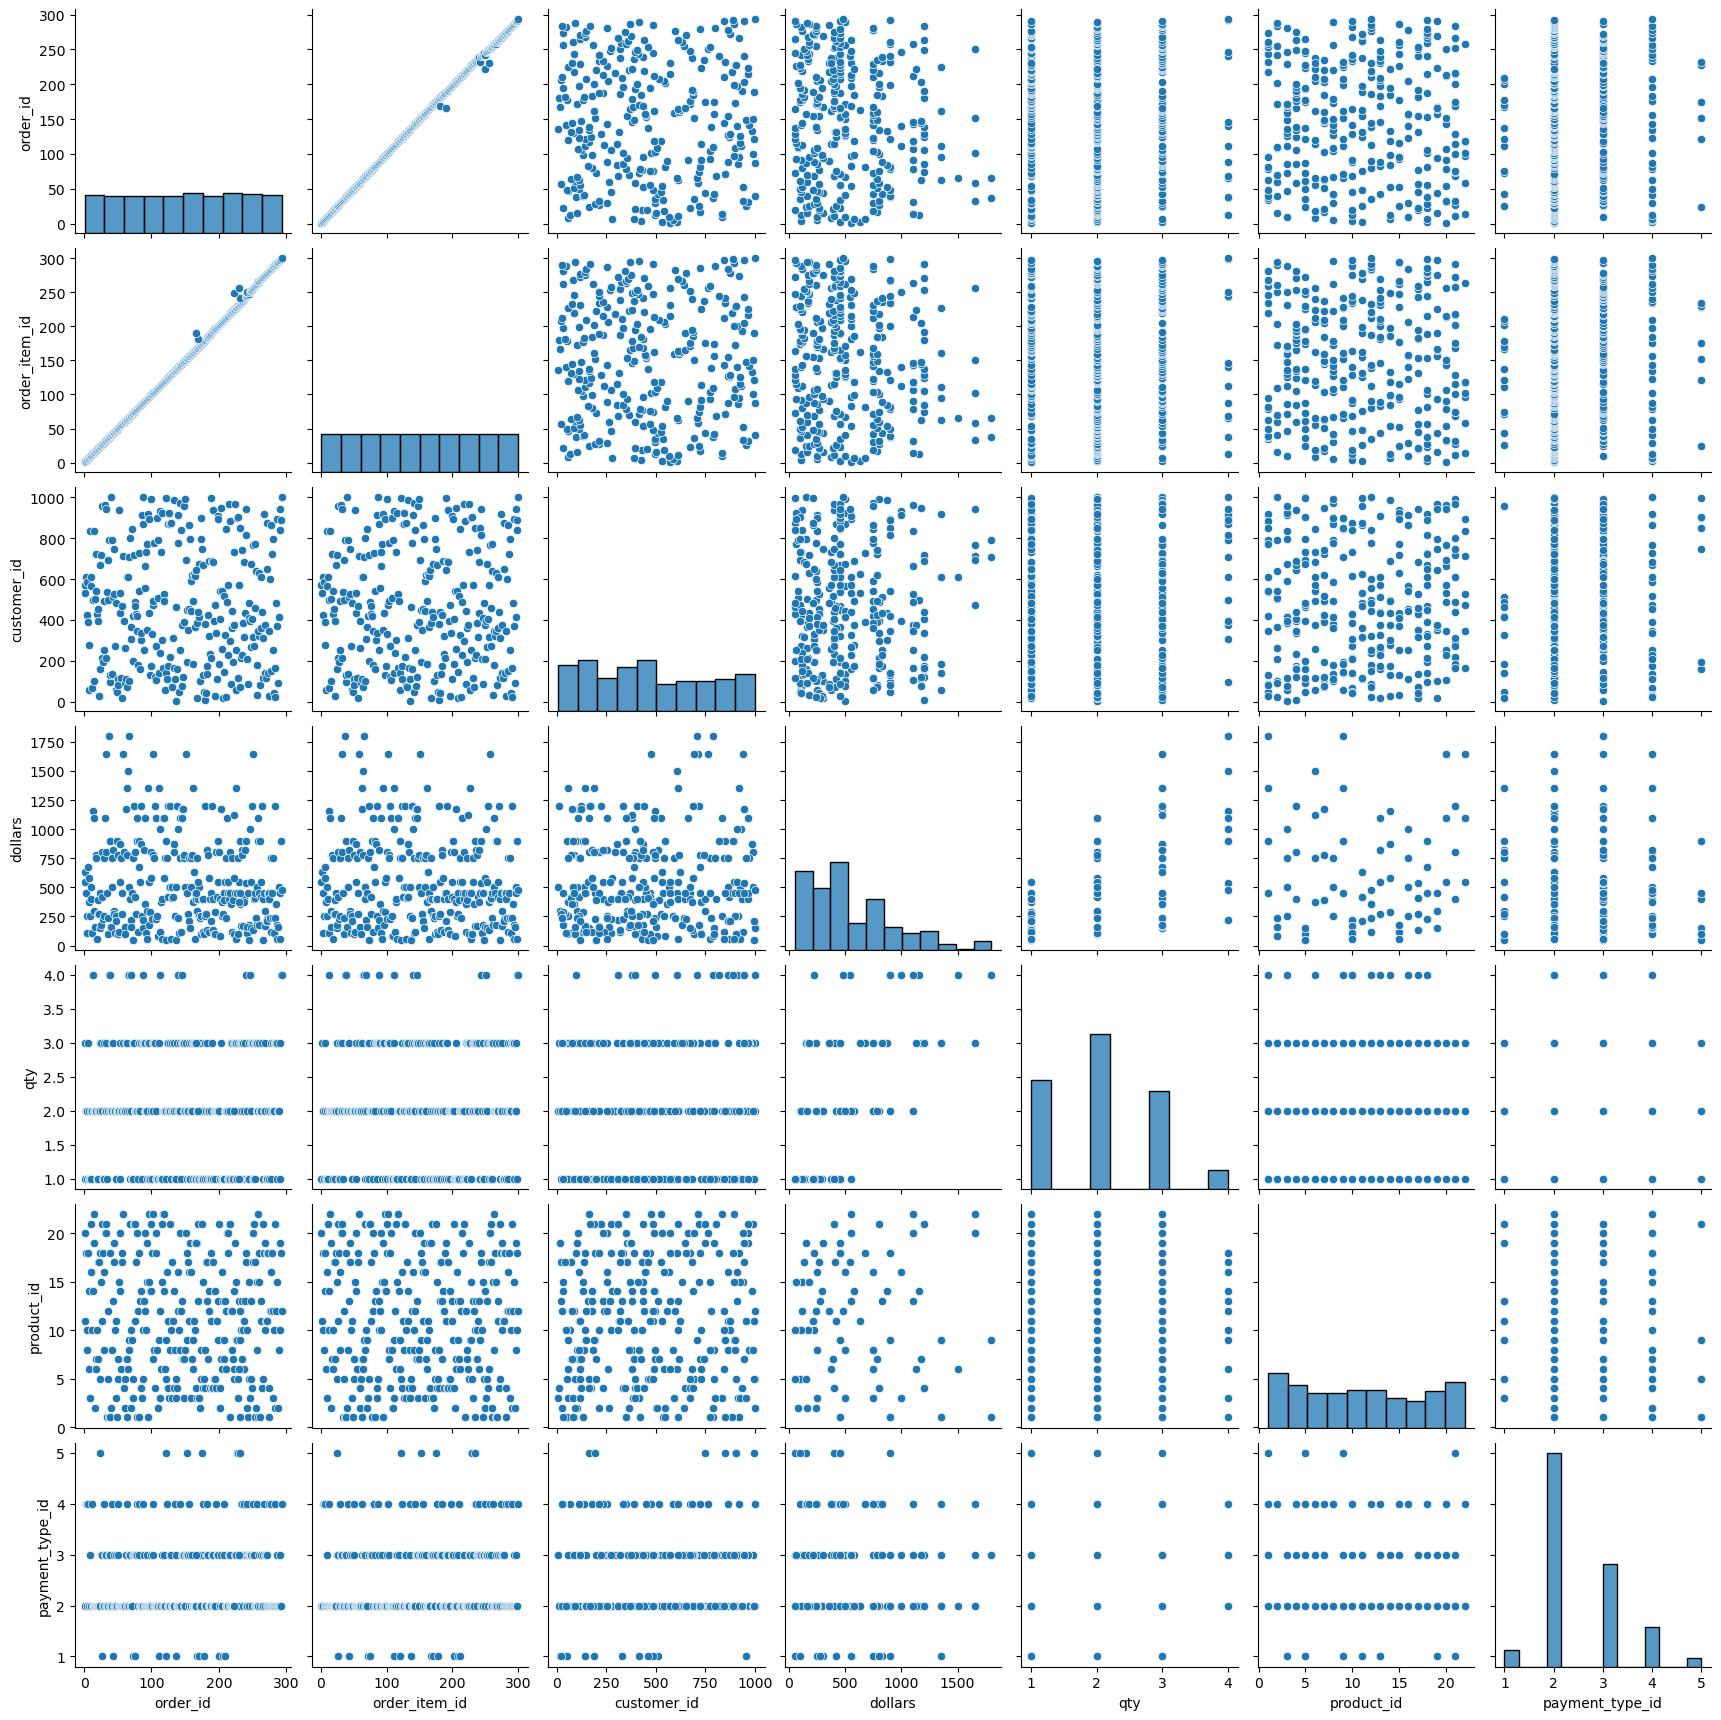

In [14]:
sns.pairplot(salesData.head(300))

Ce graphique nous montre que les colonnes des ID ('order_id', 'order_item_id', 'customer_id', 'product_id', 'payment_type_id') n'ont pas de relation particuliere avec les autres variables. Encore que les variables order_id', 'order_item_id' sont les mêmes (Relation parfaitement linéaire.) Ce qui est confirmé par le grahique de correlation qui suit.

C:\Users\USER\AppData\Local\Temp\ipykernel_8508\3894823324.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(salesData.corr(), annot=True, cmap='coolwarm', cbar= False)


<Axes: >

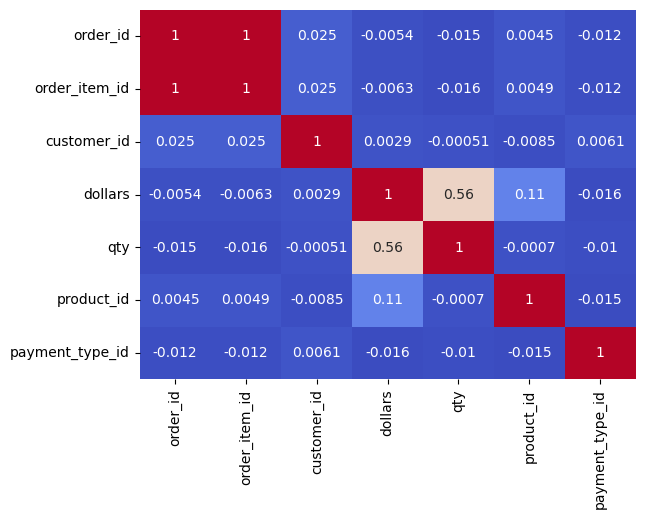

In [15]:
sns.heatmap(salesData.corr(), annot=True, cmap='coolwarm', cbar= False)

Nous constatons qu'il y a:
- Une corrélation de 0.56 indiquant une relation modérément positive entre le montant dépensé (dollars) et la quantité acheté (qty). 
- Une corrélation de -0.016 signifiant qu’il n’y a pratiquement aucun lien entre le montant dépensé (dollars) et le type de paiement (payment_type_id).

Analyse de productsData

In [16]:
productsData.head()

,product_id,category,price
0,1,A,450
1,2,B,80
2,3,C,250
3,4,D,400
4,5,E,50


In [17]:
productsData.shape

(22, 3)

In [18]:
productsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  22 non-null     int64 
 1   category    22 non-null     object
 2   price       22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


Nous pouvons donc dire:

-  productsData comporte 3 collonnes et 22 lignes;
-  Il n'y a pas de valeur manquante dans productsData;
-  Il y a 2 colonnes qui sont de type 'int64' (entier) et une colonne de type 'object' (objet).

In [19]:
productsData.columns

Index(['product_id', 'category', 'price'], dtype='object')

In [20]:
productsData['category'].value_counts(ascending=True)

D    3
E    3
B    4
C    5
A    7
Name: category, dtype: int64

In [21]:
productsData.describe(include='O')

,category
count,22
unique,5
top,A
freq,7


Cette analyse montre qu'il y a 22 produits mais classés dans cinq (5) catégories différentes. La catégorie 'A' contient plus de produits.

In [22]:
productsData.duplicated().sum()

0

Nous constatons qu'il n'y a pas de doublons dans productsData c'est-à-dire qu'il n'y a pas de lignes dupliquées.

In [23]:
productsData.describe()

,product_id,price
count,22.000000,22.000000
mean,11.500000,271.136364
std,6.493587,157.055736
min,1.000000,50.000000
25%,6.250000,138.750000
50%,11.500000,250.000000
75%,16.750000,397.500000
max,22.000000,550.000000


Nous pouvons dire que le prix moyen des produits est de 271.136364 dollars.Il y a une variation relativement importante dans les prix, avec un écart type de 157.055736 dollars. Cela indique une certaine dispersion autour de la moyenne.

Analyse de paymentsData

In [24]:
paymentsData.head()

,payment_type_id,payment_type
0,1,cash
1,2,credit card
2,3,debit card
3,4,gift card
4,5,others


In [25]:
paymentsData.shape

(5, 2)

In [26]:
paymentsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   payment_type_id  5 non-null      int64 
 1   payment_type     5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


Nous pouvons donc dire:

- paymentsData comporte 2 collonnes et 5 lignes;
- Il n'y a pas de valeur manquante dans paymentsData;
- Il y a une colonnes qui est de type 'int64' (entier) et une colonne de type 'object' (objet).

In [27]:
paymentsData.columns

Index(['payment_type_id', 'payment_type'], dtype='object')

In [28]:
paymentsData['payment_type'].value_counts(ascending=True)

cash           1
credit card    1
debit card     1
gift card      1
others         1
Name: payment_type, dtype: int64

In [29]:
paymentsData.describe(include='O')

,payment_type
count,5
unique,5
top,cash
freq,1


In [30]:
salesData['payment_type_id'].unique()

array([2, 4, 3, 5, 1], dtype=int64)

Cette analyse montre qu'on a cinq (5) types de paiement.

In [31]:
paymentsData.describe()

,payment_type_id
count,5.000000
mean,3.000000
std,1.581139
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


# Consolidons les données en un seul dataset possédant une seule ligne par client

In [32]:
salesData.shape

(10000, 8)

In [33]:
productsData.shape

(22, 3)

In [34]:
paymentsData.shape

(5, 2)

In [35]:
FullData = salesData

In [36]:
FullData.shape

(10000, 8)

In [37]:
FullData.head()

,order_id,order_item_id,tran_dt,customer_id,dollars,qty,product_id,payment_type_id
0,1,1,2020-01-01,572,550,1,20,2
1,2,2,2020-01-01,532,630,3,11,2
2,3,3,2020-01-01,608,450,2,18,4
3,4,4,2020-01-01,424,110,2,10,2
4,5,5,2020-01-01,584,250,1,8,4


In [38]:
# Création d'un DataFrame complet (FullData) en fusionnant les données :
# - La première jointure (LEFT JOIN) associe les ventes (salesData) aux informations des produits (productsData) via 'product_id'.
#   Toutes les ventes sont conservées, même si un produit correspondant est absent (valeurs NaN pour les colonnes manquantes).
# - La deuxième jointure (LEFT JOIN) ajoute les informations sur les types de paiement (paymentsData) via 'payment_type_id'.
#   Toutes les ventes restent préservées, même si un type de paiement correspondant est absent.

FullData = pd.merge(salesData, productsData, on='product_id', how='left')
FullData = pd.merge(FullData, paymentsData, on='payment_type_id', how='left')

In [39]:
FullData.head()

,order_id,order_item_id,tran_dt,customer_id,dollars,qty,product_id,payment_type_id,category,price,payment_type
0,1,1,2020-01-01,572,550,1,20,2,D,550,credit card
1,2,2,2020-01-01,532,630,3,11,2,A,210,credit card
2,3,3,2020-01-01,608,450,2,18,4,C,225,gift card
3,4,4,2020-01-01,424,110,2,10,2,E,55,credit card
4,5,5,2020-01-01,584,250,1,8,4,C,250,gift card


In [40]:
FullData.shape

(10000, 11)

# Effectuons le traitement approprié des données manquantes (ou nulles). Normalisons les données si nécessaire.

In [41]:
FullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   order_id         10000 non-null  int64 
 1   order_item_id    10000 non-null  int64 
 2   tran_dt          10000 non-null  object
 3   customer_id      10000 non-null  int64 
 4   dollars          10000 non-null  int64 
 5   qty              10000 non-null  int64 
 6   product_id       10000 non-null  int64 
 7   payment_type_id  10000 non-null  int64 
 8   category         10000 non-null  object
 9   price            10000 non-null  int64 
 10  payment_type     10000 non-null  object
dtypes: int64(8), object(3)
memory usage: 937.5+ KB


In [42]:
FullData.head()

,order_id,order_item_id,tran_dt,customer_id,dollars,qty,product_id,payment_type_id,category,price,payment_type
0,1,1,2020-01-01,572,550,1,20,2,D,550,credit card
1,2,2,2020-01-01,532,630,3,11,2,A,210,credit card
2,3,3,2020-01-01,608,450,2,18,4,C,225,gift card
3,4,4,2020-01-01,424,110,2,10,2,E,55,credit card
4,5,5,2020-01-01,584,250,1,8,4,C,250,gift card


In [43]:
FullData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
order_id,10000.0,4907.0440,2831.823320,1.0,2456.75,4910.5,7359.25,9811.0
order_item_id,10000.0,5000.5000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
customer_id,10000.0,491.5132,292.561991,1.0,235.00,476.0,748.00,1000.0
dollars,10000.0,570.7170,421.265240,50.0,240.00,450.0,800.00,2200.0
qty,10000.0,2.1108,0.882724,1.0,1.00,2.0,3.00,4.0
product_id,10000.0,11.4940,6.344288,1.0,6.00,11.0,17.00,22.0
payment_type_id,10000.0,2.5942,0.861395,1.0,2.00,2.0,3.00,5.0
price,10000.0,271.1190,153.446774,50.0,135.00,250.0,400.00,550.0


In [44]:
FullData.columns

Index(['order_id', 'order_item_id', 'tran_dt', 'customer_id', 'dollars', 'qty',
       'product_id', 'payment_type_id', 'category', 'price', 'payment_type'],
      dtype='object')

C:\Users\USER\AppData\Local\Temp\ipykernel_8508\923899793.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(FullData.corr(), annot=True, cmap='coolwarm', cbar= False)


<Axes: >

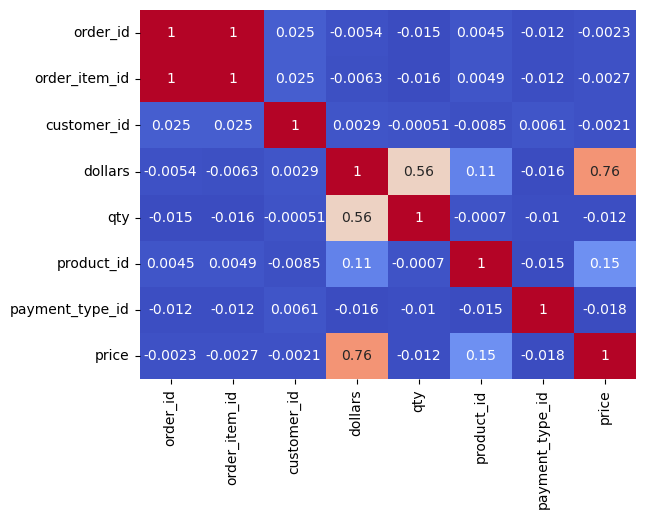

In [45]:
sns.heatmap(FullData.corr(), annot=True, cmap='coolwarm', cbar= False)

Nous constatons qu'il y a:
- Une corrélation de 0.56 indiquant une relation modérément positive entre le montant dépensé (dollars) et la quantité acheté (qty). 
- Une corrélation de 0.76 indique une forte relation positive entre le montant total (dollars) et le prix (price)
- Une corrélation de -0.016 signifiant qu’il n’y a pratiquement aucun lien entre le montant dépensé (dollars) et le type de paiement (payment_type_id).

In [46]:
analyseData = FullData[['dollars', 'qty', 'price', 'category', 'payment_type']]

En plus des fortes corrélations observées entre certaines variables, nous avons sélectionné 'dollars', 'qty', 'price', 'category' et 'payment_type' pour le clustering pour les raisons suivantes :
- 'dollars' mesure le budget total dépensé utile pour segmenter les clients;
- 'qty' permet de voir les volumes achetés;
- 'price' Permet de distinguer les clients qui privilégient des produits haut de gamme de ceux qui optent pour des options plus économiques;
- 'category' classe les produits, ce qui peut révéler des préférences spécifiques.
- 'payment_type' met en évidence des différences dans les comportements de paiement.



In [47]:
analyseData.head()

,dollars,qty,price,category,payment_type
0,550,1,550,D,credit card
1,630,3,210,A,credit card
2,450,2,225,C,gift card
3,110,2,55,E,credit card
4,250,1,250,C,gift card


In [48]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
transformer = OneHotEncoder()

In [49]:
def encodage(df):
    dic = {
        "A": '10000',
        "B": '01000',
        "C": '00100',
        "D": '00010',
        "E": "00001"
    }

    dic2 = {
        "cash": '10000',
        "credit card": '01000',
        "debit card": '00100',
        "gift card": '00010',
        "others": "00001"
    }
    df['category'] = df['category'].map(dic)
    df['payment_type'] = df['payment_type'].map(dic2)
    return df

In [50]:
analyseData['payment_type'].unique()

array(['credit card', 'gift card', 'debit card', 'others', 'cash'],
      dtype=object)

In [51]:
encoData = analyseData.copy()

In [52]:
encoData = encodage(encoData)

In [53]:
encoData.isna().sum()

dollars         0
qty             0
price           0
category        0
payment_type    0
dtype: int64

In [54]:
encoData.head()

,dollars,qty,price,category,payment_type
0,550,1,550,00010,01000
1,630,3,210,10000,01000
2,450,2,225,00100,00010
3,110,2,55,00001,01000
4,250,1,250,00100,00010


In [55]:
analyseData.head()

,dollars,qty,price,category,payment_type
0,550,1,550,D,credit card
1,630,3,210,A,credit card
2,450,2,225,C,gift card
3,110,2,55,E,credit card
4,250,1,250,C,gift card


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfScale = scaler.fit_transform(encoData)

In [57]:
dfScale.shape

(10000, 5)

In [58]:
print(dfScale)

[[-0.0491805  -1.25844071  1.81753541 -0.74561805  0.07432744]
 [ 0.1407331   1.007387   -0.39832741  1.45943801  0.07432744]
 [-0.28657251 -0.12552685 -0.30056876 -0.72575268 -0.50692125]
 ...
 [-0.46461651 -1.25844071  0.67701778  1.45943801  0.07432744]
 [ 1.25647553 -0.12552685  1.81753541  1.45943801  0.07432744]
 [ 1.49386754  1.007387    0.83994887 -0.74561805  0.07432744]]


# Modélisation

In [59]:
from sklearn.cluster import KMeans
from tqdm import tqdm

In [60]:
np.nan in dfScale

False

In [61]:
inertia = []
K = range(1, 11)
for k in tqdm(K):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(encoData)
    inertia.append(model.inertia_)

  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 10%|█         | 1/10 [00:01<00:13,  1.51s/it]C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 20%|██        | 2/10 [00:02<00:11,  1.39s/it]C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 30%|███       | 3/10 [00:04<00:09,  1.34s/it]C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` 

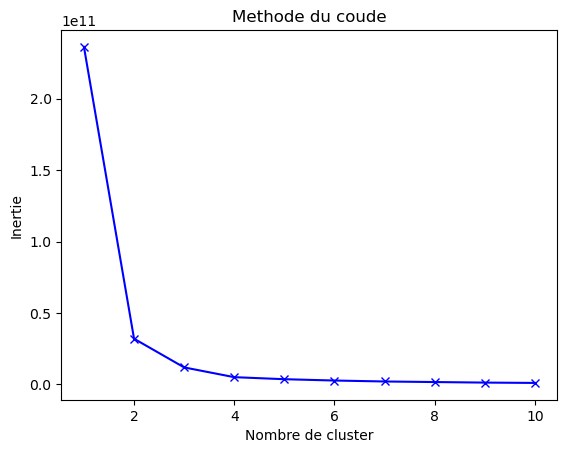

In [62]:
plt.figure()
plt.plot(K, inertia, 'bx-')
plt.xlabel('Nombre de cluster')
plt.ylabel('Inertie')
plt.title('Methode du coude')
plt.show()

In [63]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(encoData)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [64]:
y = model.predict(encoData)

In [65]:
analyseData.head()

,dollars,qty,price,category,payment_type
0,550,1,550,D,credit card
1,630,3,210,A,credit card
2,450,2,225,C,gift card
3,110,2,55,E,credit card
4,250,1,250,C,gift card


In [66]:
encoData.head()

,dollars,qty,price,category,payment_type
0,550,1,550,00010,01000
1,630,3,210,10000,01000
2,450,2,225,00100,00010
3,110,2,55,00001,01000
4,250,1,250,00100,00010


In [67]:
y

array([0, 1, 0, ..., 1, 1, 0])

In [68]:
np.unique(y)

array([0, 1, 2, 3])

In [69]:
FullData.shape

(10000, 11)

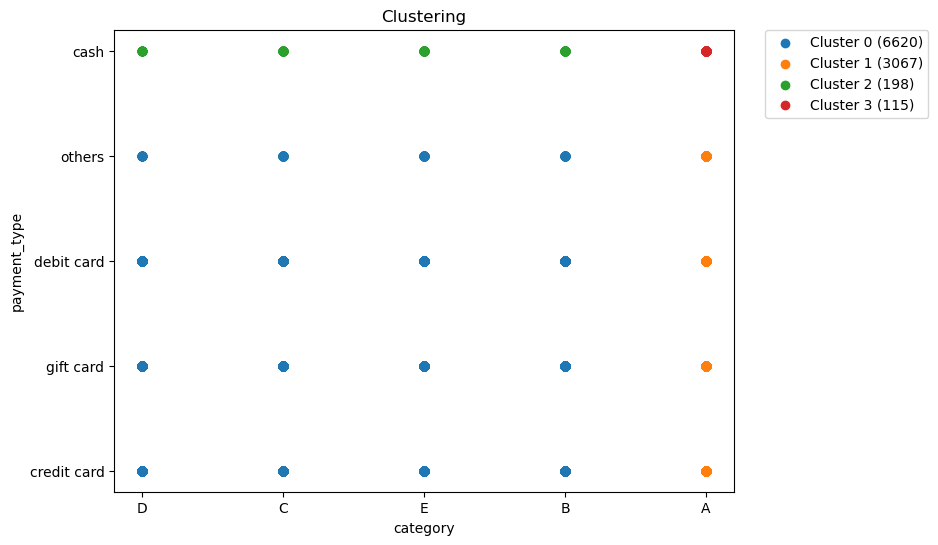

In [70]:
# Trouver les clusters uniques
unique_clusters = np.unique(y)

# Créer la figure et l'axe
fig, ax = plt.subplots(figsize=(8, 6))

# Associer une couleur à chaque cluster
for cluster in unique_clusters:
    subset = FullData[y == cluster]
    ax.scatter(subset['category'], subset['payment_type'], label=f"Cluster {cluster} ({len(subset)})")

ax.set_xlabel("category")
ax.set_ylabel("payment_type")
ax.set_title("Clustering")

# Placer la légende à l'extérieur, à droite
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()


In [71]:
centroids = model.cluster_centers_
df_centroids = pd.DataFrame(centroids, columns=analyseData.columns)
df_centroids

,dollars,qty,price,category,payment_type
0,472.527946,2.117069,223.422205,301.700604,591.179758
1,783.602869,2.091294,375.453212,10000.000000,551.164982
2,451.186869,2.222222,196.767677,317.909091,10000.000000
3,751.217391,2.078261,362.260870,10000.000000,10000.000000


In [72]:
df_centroids.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
dollars,4.0,614.633769,177.120107,451.186869,467.192676,611.872668,759.313761,783.602869
qty,4.0,2.127212,0.065361,2.078261,2.088036,2.104182,2.143358,2.222222
price,4.0,289.475991,92.461983,196.767677,216.758573,292.841538,365.558955,375.453212
category,4.0,5154.902424,5594.640693,301.700604,313.856969,5158.954545,10000.000000,10000.000000
payment_type,4.0,5285.586185,5443.760681,551.164982,581.176064,5295.589879,10000.000000,10000.000000


In [73]:
FullData['Category client'] = y

In [74]:
FullData.head()

,order_id,order_item_id,tran_dt,customer_id,dollars,qty,product_id,payment_type_id,category,price,payment_type,Category client
0,1,1,2020-01-01,572,550,1,20,2,D,550,credit card,0
1,2,2,2020-01-01,532,630,3,11,2,A,210,credit card,1
2,3,3,2020-01-01,608,450,2,18,4,C,225,gift card,0
3,4,4,2020-01-01,424,110,2,10,2,E,55,credit card,0
4,5,5,2020-01-01,584,250,1,8,4,C,250,gift card,0


# Rapport de l'analyse

Rapport d'Analyse des Ventes de 2020 du Site e-commerce

L'analyse des données de ventes du site e-commerce pour l'année 2020 nous offre une vision détaillée des comportements d'achat des clients, des tendances et des préférences en matière de produits et de modes de paiement. En explorant ces données, nous avons pu identifier des segments spécifiques de clients, des habitudes de consommation distinctes et des opportunités de croissance. Ce rapport présente les résultats clés de cette analyse et propose des recommandations stratégiques visant à optimiser les ventes et à maximiser le chiffre d'affaires du site. L'objectif est de tirer parti de ces informations pour mieux répondre aux attentes des clients et renforcer la performance commerciale du site.
Ainsi, nous présenterons une analyse approfondie des données de ventes de l'année 2020, mettant en lumière les principales tendances observées et les comportements des clients, ainsi que les recommandations stratégiques pour optimiser les performances commerciales de ce site e-commerce.

1.	Résumé des Principales Observations:

- Volume des ventes : Il a été observé que les ventes augmentent de manière significative vers la fin de l'année.
- Dépense moyenne des clients : En moyenne, chaque client dépense environ 570 dollars.
- Nombre de produits et de catégories : Le site propose 22 produits répartis en 5 catégories. La catégorie ‘A’ est la plus fournie, contenant un nombre de produits plus élevé que les autres catégories.
- Prix moyen des produits : Le prix moyen des produits est de 271 dollars;
- Modes de paiement : Le site autorise 5 types de paiement : espèces, carte de crédit, carte de débit, carte-cadeau, et autres.

Comportement des clients :

- Un groupe distinct préfère les produits des catégories ‘B’, ‘C’, ‘D’ et ‘E’, tout en excluant les produits de la catégorie ‘A’, et préfère des moyens de paiement autres que les espèces. (Cluster 0 qui compte 6620 clients).
- Un groupe de clients manifeste un intérêt particulier pour les produits de la catégorie ‘A’, mais préfère éviter les paiements en espèces. (Cluster 1 qui compte 3067 clients.
- Un autre groupe aime les produits des catégories ‘B’, ‘C’, ‘D’ et ‘E’, exclut les produits de la catégorie ‘A’ et préfère payer en espèces. (Cluster 2 qui compte 198 clients).
- Enfin, un groupe supplémentaire de clients apprécie les produits de la catégorie ‘A’ et choisit de payer en espèces. (Cluster 3 qui compte 115 clients).


2.	Recommandations Stratégiques pour Accroître le Chiffre d'Affaires :

Sur la base des tendances et des comportements observés, voici plusieurs recommandations pour améliorer les performances commerciales du site e-commerce :

- Campagnes Publicitaires Ciblées : Il est recommandé de lancer des campagnes publicitaires ciblées spécifiquement pour chaque groupe de clients. L'objectif serait d'inciter ces groupes à explorer et à acheter des produits de toutes les catégories, tout en offrant des remises attractives pour stimuler les achats croisés et accroître la diversification des achats.
- Renforcement des options de paiement par carte : En raison de la forte présence de groupes de clients qui préfèrent payer par carte de crédit, carte de débit, carte-cadeau, et autres, le site doit accepter toutes les principales cartes de crédit et de débit. Le site peut aussi inclure les cartes-cadeaux émises par lui-même ou par des plateformes tierces populaires. Cela facilitera les paiements pour les clients.
- Ajout des solutions de paiement via des applications mobiles : Il est recommandé d’intégrer des options de paiement mobiles ou même des applications locales spécifiques. Cela permet d’offrir plus de flexibilité et d'attirer des clients qui préfèrent utiliser leurs téléphones pour payer.
- Simplification du processus de paiement : Un processus de paiement rapide et sans friction est essentiel pour convertir les visiteurs en acheteurs. Le site pourra offrir la possibilité de sauvegarder les informations de paiement pour les achats futurs de manière sécurisée, ou permettre un paiement en un clic.
- Éducation sur les méthodes de paiement : Bien que la majorité des clients préfère les paiements électroniques, il peut y en avoir quelques-uns qui hésitent encore. Un petit guide sur les options de paiement et la sécurité de celles-ci peut aider à dissiper les doutes. Aussi, le site pourra continuer avec l’option de paiement en espèces à la livraison ou en point de retrait pour encourager ceux qui préfèrent payer en espèces tout en les éduquant sur les autres modes de paiement.

3.	Conclusion :

L'analyse des données des ventes 2020 de ce site permet de comprendre les comportements d'achat des clients et d'identifier des segments clés à cibler. En mettant en œuvre des campagnes publicitaires bien ciblées et en optimisant les moyens de paiement, le site pourra potentiellement augmenter son chiffre d'affaires en attirant une clientèle plus large et en maximisant les ventes croisées entre les différentes catégories de produits. Le site pourra aussi élargir son offre en ajoutant une gamme de produits diversifiés pour les catégories qui sont actuellement sous-représentées car beaucoup de clients s’intéressent à ces catégories.
